In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,KFold,GridSearchCV
from sklearn.metrics import accuracy_score,fbeta_score,f1_score
import numpy as np
import matplotlib.pyplot as plt
from helpers import make_complexity_curve, make_learning_curve,make_timing_curve,make_timing_curve_fixed, plot_result,make_timing_curve_from_param
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
adult_df = pd.read_csv(filepath_or_buffer="adult_cleaned.csv")
adult_df_dummies = pd.get_dummies(adult_df.drop('target', 1))
adult_x = adult_df_dummies.copy().values
adult_y = adult_df["target"].copy().values
X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(adult_x, adult_y, test_size=0.2,random_state=0)
print(f"adult_df: {adult_df.shape}")
print(f"X_adult_train: {X_adult_train.shape}")
print(f"X_adult_test: {X_adult_test.shape}")
print(f"y_adult_train: {y_adult_train.shape}")
print(f"y_adult_test: {y_adult_test.shape}")
print(f"y_adult_train pos: {(y_adult_train > 0).sum() / len(y_adult_train)}")
print(f"y_adult_train neg: {(y_adult_train == 0).sum() / len(y_adult_train)}")
pipeAdult = Pipeline([('Scale',StandardScaler())])
X_trans_adult_train = pipeAdult.fit_transform(X_adult_train, y_adult_train)
print(f"X_tran_adult_train: {X_trans_adult_train.shape}")

adult_df: (30162, 13)
X_adult_train: (24129, 70)
X_adult_test: (6033, 70)
y_adult_train: (24129,)
y_adult_test: (6033,)
y_adult_train pos: 0.2489535413817398
y_adult_train neg: 0.7510464586182601
X_tran_adult_train: (24129, 70)


In [3]:
spam_df = pd.read_csv('spambase.csv', header=0)
spam_x = spam_df.drop('class', axis=1).copy().values
spam_y = spam_df['class'].copy().values
X_spam_train, X_spam_test, y_spam_train, y_spam_test = train_test_split(spam_x, spam_y, test_size=0.2,random_state=0)
print(f"spam_df: {spam_df.shape}")
print(f"X_spam_train: {X_spam_train.shape}")
print(f"X_spam_test: {X_spam_test.shape}")
print(f"y_spam_train: {y_spam_train.shape}")
print(f"y_spam_test: {y_spam_test.shape}")
print(f"y_spam_train pos: {(y_spam_train > 0).sum() / len(y_spam_train)}")
print(f"y_spam_train neg: {(y_spam_train == 0).sum() / len(y_spam_train)}")
pipeSpam = Pipeline([('Scale',StandardScaler())])
X_trans_spam_train = pipeSpam.fit_transform(X_spam_train, y_spam_train)
print(f"X_tran_spam_train: {X_trans_spam_train.shape}")

spam_df: (4601, 58)
X_spam_train: (3680, 57)
X_spam_test: (921, 57)
y_spam_train: (3680,)
y_spam_test: (921,)
y_spam_train pos: 0.38858695652173914
y_spam_train neg: 0.6114130434782609
X_tran_spam_train: (3680, 57)


In [4]:
adult_params = {
    'n_estimators': [1,2,5,10,20,30,45,60,80,100],
    'base_estimator__max_depth': list(np.arange(1, 30, 3)),
    'learning_rate': [0.01,0.05,0.1,0.3,1]
}

spam_params = {
    'n_estimators': [1,2,5,10,20,30,45,60,80,100],
    'base_estimator__max_depth': list(np.arange(1, 30, 3)),
    'learning_rate': [0.01,0.05,0.1,0.3,1]
}

In [5]:
adult_cv = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=123), random_state=123),param_grid=adult_params, cv=5)
adult_cv.fit(X_trans_adult_train, y_adult_train)
print(f"best params adult: {adult_cv.best_params_}")

best params adult: {'base_estimator__max_depth': 4, 'learning_rate': 0.3, 'n_estimators': 45}


In [6]:
spam_cv = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=123),random_state=123),param_grid=spam_params, cv=5)
spam_cv.fit(X_trans_spam_train, y_spam_train)
spam_cv.best_params_
print(f"best params spam: {spam_cv.best_params_}")

best params spam: {'base_estimator__max_depth': 22, 'learning_rate': 1, 'n_estimators': 45}


In [ ]:
adult_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=123, max_depth=4), learning_rate = 0.3, n_estimators = 45, random_state=123)
adult_clf.fit(X_trans_adult_train, y_adult_train)

In [ ]:
spam_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=123, max_depth=6), learning_rate = 1, n_estimators = 45, random_state=123)
spam_clf.fit(X_trans_spam_train, y_spam_train)

**Complexity**

In [9]:
adult_cc_estimators = make_complexity_curve(adult_clf, X_trans_adult_train, y_adult_train, "n_estimators", [1,2,5,10,20,30,45,60,80,100],"boosting complexity n_estimators", "adult")

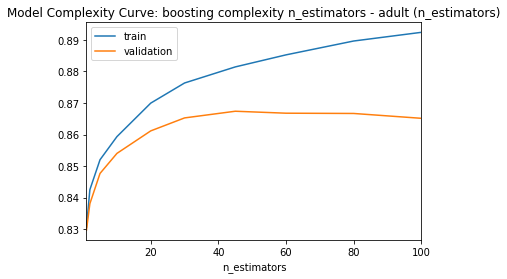

In [10]:
adult_cc_estimators.plot(title=adult_cc_estimators.name)

In [43]:
spam_cc_estimators = make_complexity_curve(spam_clf.set_params(**{'base_estimator__max_depth':6}), X_trans_spam_train, y_spam_train, "n_estimators", [1,2,5,10,20,30,45,60,80,100],"boosting complexity n_estimators", "spam")

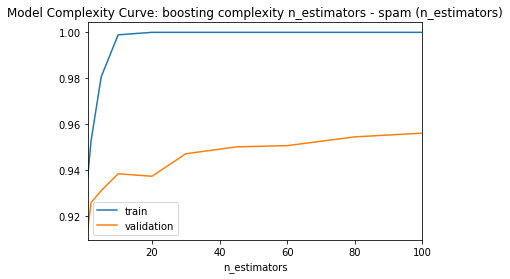

In [44]:
spam_cc_estimators.plot(title=spam_cc_estimators.name)

In [13]:
adult_cc_learning_rate = make_complexity_curve(adult_clf, X_trans_adult_train, y_adult_train, "learning_rate", [0.01,0.05,0.1,0.3,1],"boosting complexity learning rate", "adult")

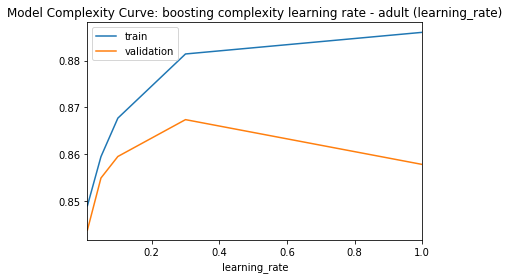

In [45]:
adult_cc_learning_rate.plot(title=adult_cc_learning_rate.name)

In [46]:
spam_cc_learning_rate = make_complexity_curve(spam_clf, X_trans_spam_train, y_spam_train, "learning_rate", [0.01,0.05,0.1,0.3,1], "boosting complexity learning rate", "spam")

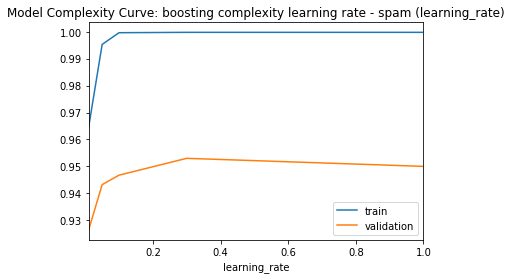

In [47]:
spam_cc_learning_rate.plot(title=spam_cc_learning_rate.name)

In [ ]:
adult_cc_md = make_complexity_curve(adult_clf, X_trans_adult_train, y_adult_train, "base_estimator__max_depth", list(np.arange(1, 30, 1)),"boosting complexity", "adult")

In [ ]:
adult_cc_md.plot(title=adult_cc_md.name)

In [ ]:
spam_cc_md = make_complexity_curve(spam_clf, X_trans_spam_train, y_spam_train, "base_estimator__max_depth", list(np.arange(1, 30, 1)),"boosting complexity", "spam")

In [ ]:
spam_cc_md.plot(title=spam_cc_md.name)

In [ ]:
adult_cc_estimators_with_md = make_complexity_curve(adult_clf.set_params(**{'base_estimator__max_depth': 25}), X_trans_adult_train, y_adult_train, "n_estimators", [1,2,5,10,20,30,45,60,80,100],"boosting max_depth25", "adult")

In [ ]:
adult_cc_estimators_with_md.plot(title=adult_cc_estimators_with_md.name)

In [ ]:
spam_cc_estimators_with_md = make_complexity_curve(spam_clf.set_params(**{'base_estimator__max_depth': 25}), X_trans_spam_train, y_spam_train, "n_estimators", [1,2,5,10,20,30,45,60,80,100],"boosting max_depth25", "spam")

In [ ]:
spam_cc_estimators_with_md.plot(title=spam_cc_estimators_with_md.name)

**Timing curve**

In [ ]:
adult_timing = make_timing_curve(adult_clf,X_trans_adult_train, y_adult_train,'boosting', 'adult')

In [ ]:
adult_timing.plot(title=adult_timing.name)

In [ ]:
spam_timing = make_timing_curve(spam_clf,X_trans_spam_train, y_spam_train,'boositng', 'spam')

In [ ]:
spam_timing.plot(title=spam_timing.name)

In [60]:
adult_timing_n_estimators = make_timing_curve_from_param(adult_clf,X_trans_adult_train, y_adult_train, 'n_estimators', [1,2,5,10,20,30,45,60,80,100], 'boositng timing n_estimators', 'adult')

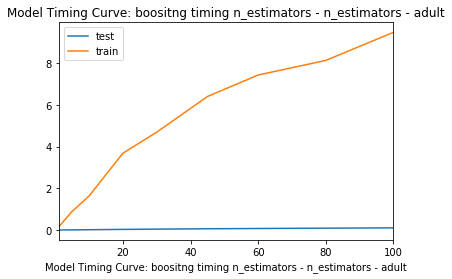

In [61]:
adult_timing_n_estimators.plot(title=adult_timing_n_estimators.name)

In [62]:
spam_timing_n_estimators = make_timing_curve_from_param(spam_clf,X_trans_spam_train, y_spam_train,'n_estimators', [1,2,5,10,20,30,45,60,80,100], 'boositng timing n_estimators', 'spam')

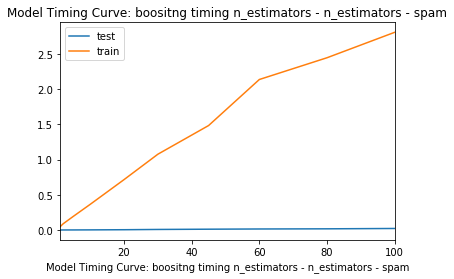

In [63]:
spam_timing_n_estimators.plot(title=spam_timing_n_estimators.name)

**Learning Curve**

In [64]:
adult_lc = make_learning_curve(adult_clf,X_trans_adult_train, y_adult_train,np.linspace(0.1, 1.0, 10),'boosting timing', 'adult')

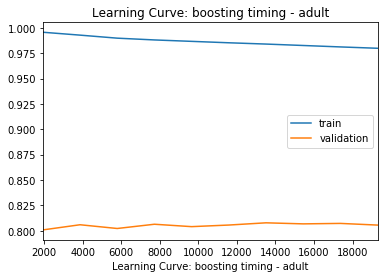

In [65]:
adult_lc.plot(title=adult_lc.name)

In [66]:
spam_lc = make_learning_curve(spam_clf,X_trans_spam_train, y_spam_train,np.linspace(0.1, 1.0, 10),'boosting timing', 'spam')

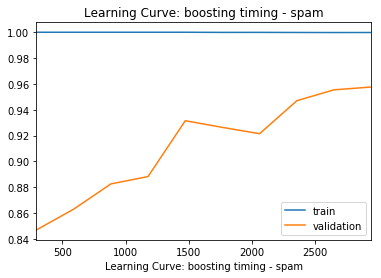

In [67]:
spam_lc.plot(title=spam_lc.name)

**Train accuracy**

In [68]:
print(f"Adult train score: {adult_clf.score(pipeAdult.transform(X_adult_train), y_adult_train)}")

Adult train score: 0.9451697127937336


In [69]:
print(f"Spam train score: {spam_clf.score(pipeSpam.transform(X_spam_train), y_spam_train)}")

Spam train score: 0.9918478260869565


**Test Accuracy**



In [70]:
print(f"Adult test score: {adult_clf.score(pipeAdult.transform(X_adult_test), y_adult_test)}")

Adult test score: 0.8044090833747721


In [71]:
print(f"Spam test score: {spam_clf.score(pipeSpam.transform(X_spam_test), y_spam_test)}")

Spam test score: 0.9511400651465798
